In [44]:
from urllib.request import urlopen

# открываю текст по url
html = urlopen("http://lib.ru/ADAMS/rhit1s.txt")

In [45]:
import re
import nltk
nltk.download('punkt')
import pymorphy2

# составляю словарь частот, предварительно приведя строчки в норм состояние
text = " ".join([re.sub('[^А-Яа-я]', " ", line.decode(html.headers.get_content_charset())) for line in html])
tokenizedWords = nltk.tokenize.word_tokenize(text)
freq = nltk.FreqDist(tokenizedWords)

# нормализованный словарь частот, кэш для оптимизации
dictCache = {}
morph = pymorphy2.MorphAnalyzer()
def norm(word):
    if word in dictCache:
        return dictCache[word]
    dictCache[word] =  morph.parse(word)[0].normal_form
    return dictCache[word]

freq_norm = nltk.FreqDist([norm(word) for word in tokenizedWords])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\krendeleno\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [46]:
import math
from matplotlib import pyplot as pp

def graph(freq_list):
    pp.plot([math.log(i) for i in range(1, len(freq_list) + 1)], [math.log(freq_list[i]) for i in freq_list], '.')

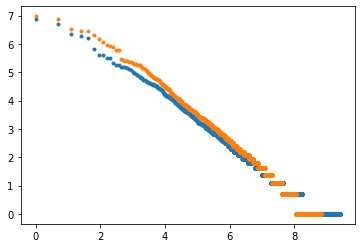

In [47]:
# рисую графики, решила что лучше на одном рисунке чтобы заметнее различие
graph(freq)
graph(freq_norm)


In [83]:
# пытаюсь в линейную регрессию
import numpy as np
from sklearn.linear_model import LinearRegression

points = np.log(np.array([[i for i in range(1, len(freq_norm) + 1)], [(freq_norm[i]) for i in freq_norm]]))

reg = LinearRegression()
reg.fit(points.T[:, 0:1], points.T[:, 1])

print(f'k = {reg.coef_}, b = {reg.intercept_}')

k = [-0.98978389], b = 8.436748651450593


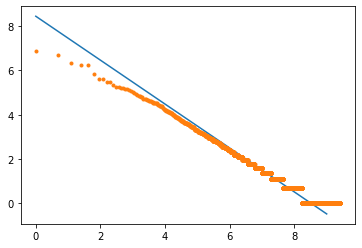

In [84]:
# рисую график
# p.s. просто невероятно, что в библиотеке для рисования
# графиков нельзя нарисовать линию по коэффициентам!

def get_y(x):
    return reg.intercept_ + reg.coef_ * x

pp.plot([0, 9], [get_y(0), get_y(9)], '-')
graph(freq)